# Dunnhumby Dataset

Pursuing a comprehensive approach over a Complex Retail Dataset (black-box: no column nor relationship definition available)

- Exploratory Data Analysis
- Data Understanding
- Answering Business Questions
- KPI development
- ML Model to predict Targets

## Kaggle Description:

This dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included.

Due to the number of tables (8) and the overall complexity of The Complete Journey, it is suggested that this database be used in more advanced classroom settings. Further, The Complete Journey would be ideal for academic research as it should enable one to study the effects of direct marketing to customers.

The following are examples of questions that could be submitted to students or considered for academic research:

- How many customers are spending more over time? Less over time? Describe these customers.
- Of those customers who are spending more over time, which categories are growing at a faster rate?
- Of those customers who are spending less over time, with which categories are they becoming less engaged?
- Which demographic factors (e.g. household size, presence of children, income) appear to affect customer spend? -Engagement with certain categories?
- Is there evidence to suggest that direct marketing improves overall engagement?

Source: https://www.kaggle.com/datasets/frtgnn/dunnhumby-the-complete-journey?datasetId=408408&sortBy=voteCount

# Library Import

In [2]:
import pandas as pd 
import numpy as np 

# Visualizations

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import style
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from seaborn import distplot
from seaborn import boxplot
from seaborn import violinplot
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline


# Warnings

import warnings
warnings.filterwarnings('ignore')

# Data import

In [3]:
df_1 = pd.read_csv('Data\campaign_desc.csv')
df_2 = pd.read_csv('Data\campaign_table.csv')
df_3 = pd.read_csv('Data\causal_data.csv')
df_4 = pd.read_csv('Data\coupon_redempt.csv')
df_5 = pd.read_csv('Data\coupon.csv')
df_6 = pd.read_csv('Data\hh_demographic.csv')
df_7 = pd.read_csv('Data\product.csv')
df_8 = pd.read_csv('Data\Transaction_data.csv')

# Data Understanding

In [4]:
print(
    
    "df1 columns are : " , df_1.columns, '\n------------------------------------------------------------------------------------\n',
    "df2 columns are : " ,df_2.columns, '\n------------------------------------------------------------------------------------\n',
    "df3 columns are : " ,df_3.columns,'\n------------------------------------------------------------------------------------\n',
    "df4 columns are : " ,df_4.columns,'\n------------------------------------------------------------------------------------\n',
    "df5 columns are : " ,df_5.columns,'\n------------------------------------------------------------------------------------\n',
    "df6 columns are : " ,df_6.columns,'\n------------------------------------------------------------------------------------\n',
    "df7 columns are : " ,df_7.columns,'\n------------------------------------------------------------------------------------\n',
    "df8 columns are : " ,df_8.columns)


df1 columns are :  Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY'], dtype='object') 
------------------------------------------------------------------------------------
 df2 columns are :  Index(['DESCRIPTION', 'household_key', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------
 df3 columns are :  Index(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer'], dtype='object') 
------------------------------------------------------------------------------------
 df4 columns are :  Index(['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------
 df5 columns are :  Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object') 
------------------------------------------------------------------------------------
 df6 columns are :  Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_CO

### Observations

Prima Fascie,

First 5 tables belong to Campaigns and Coupons.
Number 7 to Products Information. 
Number 6 & 8 contain Customers + Spending + Demographics Information.

We will adress these last two files first.

In [5]:
df_demographics = df_6.copy()
df_transactions = df_8.copy()

In [6]:
# demographics Dataframe Inspection

for col in df_demographics.columns:
    print(df_demographics[col].unique())

['65+' '45-54' '25-34' '35-44' '19-24' '55-64']
['A' 'U' 'B']
['35-49K' '50-74K' '25-34K' '75-99K' 'Under 15K' '100-124K' '15-24K'
 '125-149K' '150-174K' '250K+' '175-199K' '200-249K']
['Homeowner' 'Unknown' 'Renter' 'Probable Renter' 'Probable Owner']
['2 Adults No Kids' '2 Adults Kids' 'Single Female' 'Unknown'
 'Single Male' '1 Adult Kids']
['2' '3' '4' '1' '5+']
['None/Unknown' '1' '2' '3+']
[   1    7    8   13   16   17   18   19   20   22   25   27   31   39
   40   42   43   46   48   49   52   55   56   57   58   67   71   74
   77   78   80   85   86   97   98  101  104  105  109  110  113  114
  117  118  119  121  123  127  131  133  134  136  139  149  155  157
  158  159  161  164  165  166  170  178  184  192  193  198  201  208
  209  211  212  214  216  218  219  220  221  222  230  232  235  239
  242  243  248  249  250  253  256  257  263  264  276  281  282  283
  289  290  294  300  301  302  304  306  309  314  317  319  321  324
  325  329  332  334  346  350  3

We may want to change de Marital Status Code to the full meaning, we´r keeping it as text anyway.

Source of interpretation: USA Agency for HealthCare Research and Quality
https://ushik.ahrq.gov/ViewItemDetails?system=sdo&itemKey=133169000

In [7]:
df_demographics['MARITAL_STATUS_CODE'] = df_demographics['MARITAL_STATUS_CODE'].replace(['U','A','B'],["Unmarried","CommonLaw","RegisteredPartner"])


In [8]:
df_demographics.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,CommonLaw,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,CommonLaw,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,Unmarried,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,Unmarried,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,RegisteredPartner,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [9]:
def EDA(df_demographics):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_demographics.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_demographics.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df_demographics.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_demographics.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_demographics[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_demographics.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df_demographics.duplicated().sum())
          
EDA(df_demographics)


EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(801, 8) 
------------------------------------------------------------------------------------

Columns :
Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'household_key'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    

In [10]:
# Transactions Dataframe Inspection

df_transactions.head(5)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [11]:
def EDA(df_transactions):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_transactions.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_transactions.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes & Missing values:' + '\033[0m')
    print(df_transactions.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_transactions.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_transactions[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_transactions.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df_transactions.duplicated().sum())
          
EDA(df_transactions)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(2595732, 12) 
------------------------------------------------------------------------------------

Columns :
Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes & Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DIS

Good news. We can expect cleansed and ordered data as well for the next files. We will nontheless check later. Lets start working these first files.

# Visual Exploration: Univariate Analysis

Time to know our customers. Lets begin with univariate analysis to gain some general insights and plan further metrics and relationships.

## Household Demographics

In [12]:
def pie_categorical(df_demographics):

    #function to plot the histogram of categorical variables in pie graph
    features = df_demographics.columns

    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(15,15))
    count = 1

    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        df_demographics[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1

def hist_numeric(df_demographics):

    #function to plot the histogram of numeric variables
    features = df_demographics.columns
    fig_hists = plt.figure(figsize=(15,15))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1

    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        df_demographics[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1

 

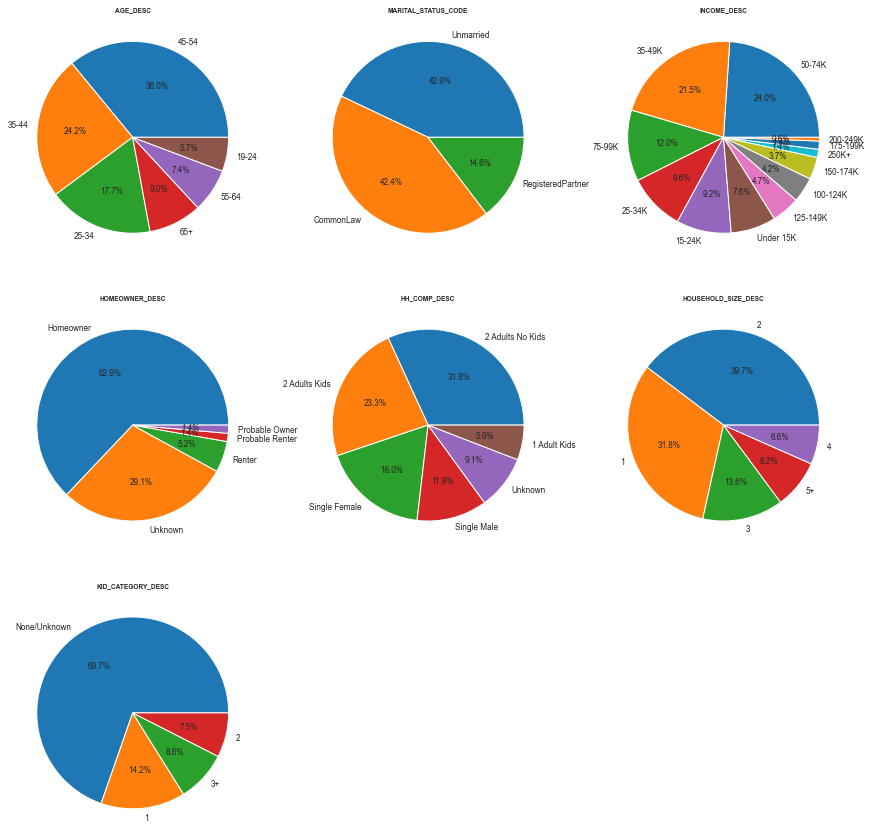

In [13]:
pie_categorical(df_demographics.drop("household_key",axis=1))

### Findings:

- Children: Majority of the customers does not have a child (~70%)
- Household Size: Majority of Households made up of 1 or 2 persons (~70%)
- Age: Majority of the customers age in between 35-54 (~60%)
- Income: Almost half of the population have a yearly salary between $35-74K
- House Ownership: Majority of the customers own a house (63%)


## Transactions

Grouping by Houshold to pull some numbers

In [14]:
grouped_sum = df_transactions.groupby("household_key").sum()

### What is the Average total spent by a household within these two years?

In [15]:

avg_purchase = round(df_transactions.SALES_VALUE.sum()/len(grouped_sum),1)
print("The average Total Spent by Household was: $", avg_purchase)

The average Total Spent by Household was: $ 3223.0


### What is the Average total number of products purchased by a household within two years?

In [16]:
avg_tot_prod = round(grouped_sum["QUANTITY"].mean(),1)
print("The Average total number of products purchased by a household is: " , avg_tot_prod)

The Average total number of products purchased by a household is:  104274.2


### What is the average total number of unique products purchased by a household within two years?

In [17]:
avg_uniq_prod = round(len(df_transactions.groupby(["household_key","PRODUCT_ID"]).sum()["QUANTITY"])/len(grouped_sum),1)
print("The Average total number of unique products purchased by a household is: " , avg_uniq_prod)

The Average total number of unique products purchased by a household is:  560.6


### What is the Average number of store visits per household within two years?

In [18]:
avg_days_visited = round(len(df_transactions.groupby(["household_key","DAY"]).count())/len(grouped_sum),1)
print("The Average number of store visits per household is : " , avg_days_visited)

The Average number of store visits per household is :  90.2


### All these measures (besides serving monthly and anually reports) are candidates for building KPIs with real-time stream/batch data flowing to dashboards.

### Top Stores and Customers 

How are the stores performing? Which are our most spending customers?

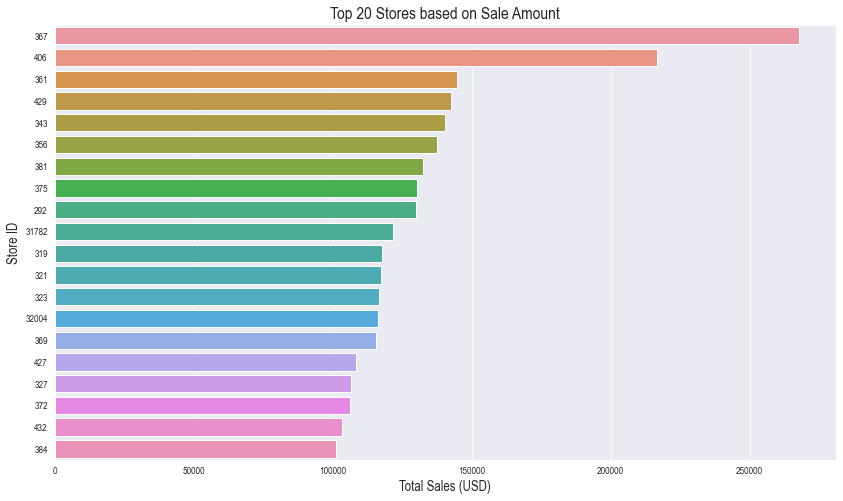

In [19]:
sales_per_store = df_transactions.groupby("STORE_ID").sum()["SALES_VALUE"].sort_values(ascending=False)
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["Store ID","Total Sales (USD)"])
fig_store = plt.figure(figsize=(14,8))
sns.barplot(y="Store ID",x="Total Sales (USD)",data = sales_per_store[:20],order=sales_per_store[:20]["Store ID"],orient="h")
plt.title('Top 20 Stores based on Sale Amount', fontsize=17)
plt.xlabel('Total Sales (USD)', fontsize=14)
plt.ylabel('Store ID', fontsize=14)
plt.show()

Top 20 customers based on total purchase amount (USD)

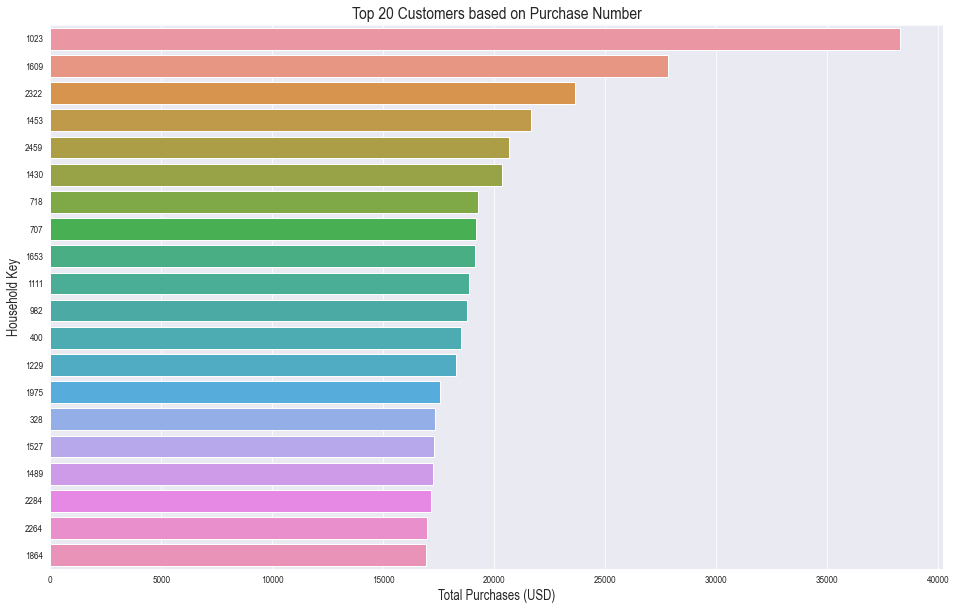

In [46]:
purc_per_cust = df_transactions.groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase (USD)"])
fig_store = plt.figure(figsize=(16,10))
sns.barplot(y="household_key",x="Total Purchase (USD)",data = purc_per_cust[:20],order=purc_per_cust[:20]["household_key"],orient="h")
plt.title('Top 20 Customers based on Purchase Number', fontsize=17)
plt.xlabel('Total Purchases (USD)', fontsize=14)
plt.ylabel('Household Key', fontsize=14)
plt.show()

This information could help us to:

- Identify top stores, and with the help of segmentation (location, size), identify as well further variables of top performance (employee motivation,store design), applying thus this elements to other stores to increment profit.
- Identify top customer profile, to
    a) attract more potential customers with these profiles.
    b) keep up business model elements that attract these profiles.
- Reward Top Stores and Top Customers.

## Campaign Types & Duration

Campaign description data is a look up table, containing the start and the end days of each campaign (30 campaigns in total). Also it gives which campaign belongs to what category (Type A, B and C). For the time being, we ignore what Types category means. 

In [21]:
df_campaing_dates = df_1
df_campaing_dates.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


Each Campaign Duration

Let's calculate and visualise how long each campaign lasted within two years period

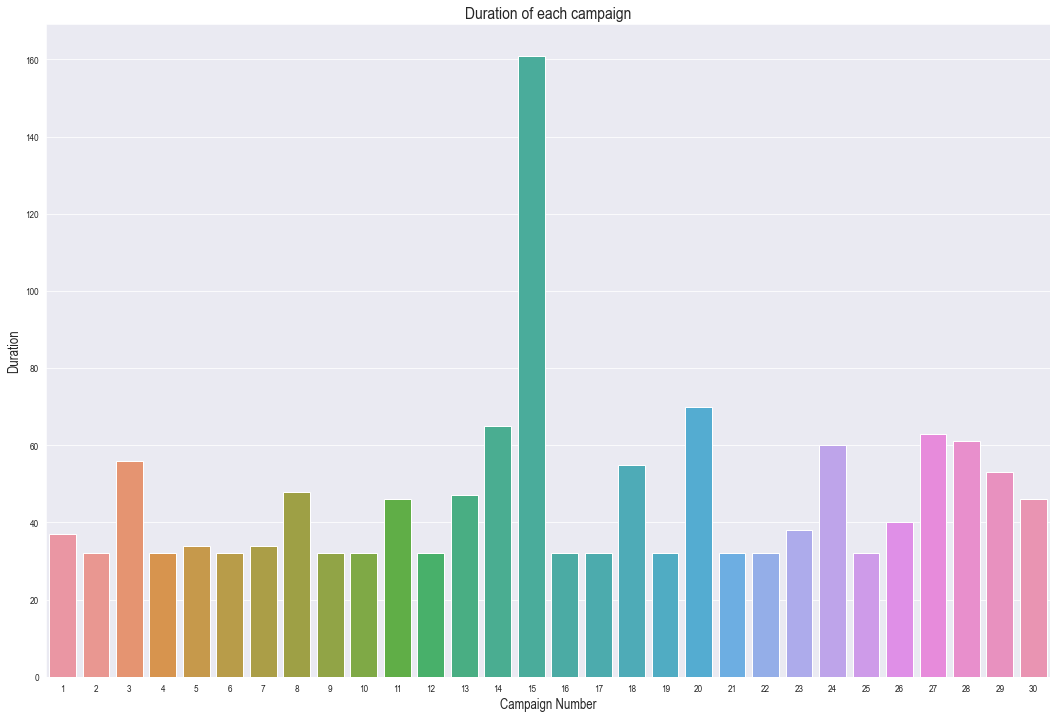

In [45]:
df_campaing_dates["DUR"] = df_campaing_dates.END_DAY-df_campaing_dates.START_DAY
fig = plt.figure(figsize=(18,12))
sns.barplot(x="CAMPAIGN",y="DUR",data=df_campaing_dates,orient="v",
            order=df_campaing_dates.sort_values(by="CAMPAIGN").CAMPAIGN.values)
plt.title('Duration of each campaign', fontsize=17)
plt.xlabel('Campaign Number', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.show()

Campaign No:15 lasts the longest with a staggering 160 days figure, where other campaigns are fairly close to each other ranging from 30 to 70 days Average campaign duration is 37 days (median)

## Campaigns & Households

Campaign dataset contains identifying information for the marketing campaigns each household participated in.

In [23]:
df_campaign_hh = df_2
df_campaign_hh.head(5)

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


How many households participated or received a campaign? We know from the dataset description, that there are 2500 households.

In [28]:
print("the number of households that received a campaing are:" , len(df_campaign_hh.household_key.unique()))

the number of households that received a campaing are: 1584


In [42]:
print(round(1584/2500*100) , "% of households received a campaign")

63 % of households received a campaign


To be more specific, lets see Campaings per Households

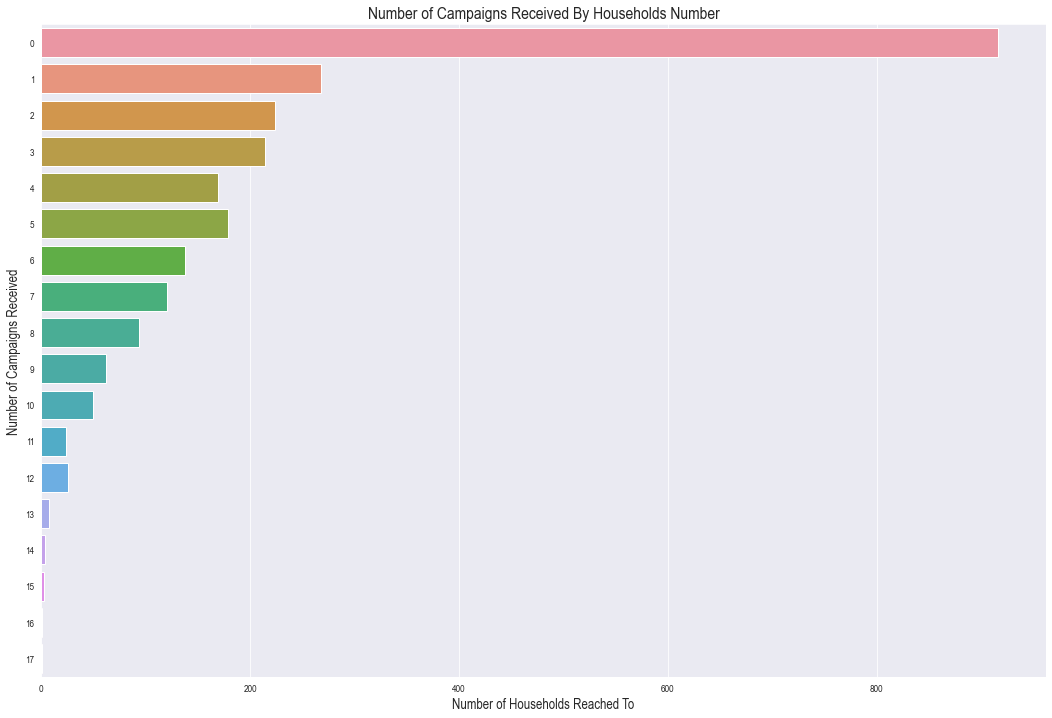

In [44]:
total_households = 2500

no_of_received_campaigns_per_house = df_campaign_hh.household_key.value_counts()
no_of_received_campaigns = no_of_received_campaigns_per_house.value_counts()
no_of_received_campaigns[0] = total_households-len(no_of_received_campaigns_per_house)
no_of_received_campaigns = pd.DataFrame(list(zip(no_of_received_campaigns.index,no_of_received_campaigns))
                                        ,columns=["Number of Campaigns Received",
                                                  "Number of Households Reached To"]).sort_values(
                                                                                            by="Number of Campaigns Received",ascending=True)
plt.figure(figsize=(18,12))
sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=no_of_received_campaigns,orient="h",order=no_of_received_campaigns["Number of Campaigns Received"])
plt.title('Number of Campaigns Received By Households Number', fontsize=17)
plt.xlabel('Number of Households Reached To', fontsize=14)
plt.ylabel('Number of Campaigns Received', fontsize=14)
plt.show()

While 37% of households never received/participated in a campaing (not good), the distribution of number of campaigns through households looks decent. 
Against reasonable business expectations, what we would love to have is actually de opposite (the plot inverted): more campaigns distributed over more households.

Most Frequent Campaigns

Graph below gives the most frequent campaigns. 

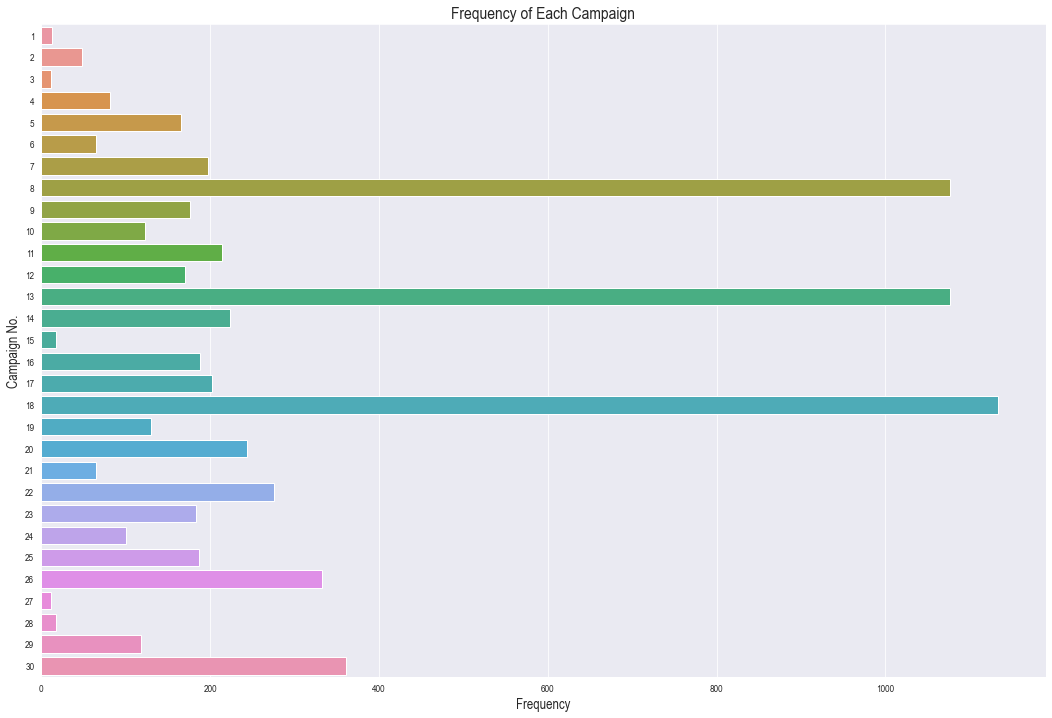

In [48]:
freq_campaigns = pd.DataFrame(list(zip(df_campaign_hh.CAMPAIGN.value_counts().index, 
                                       df_campaign_hh.CAMPAIGN.value_counts())),columns=["Campaign","Frequency"])
fig = plt.figure(figsize=(18,12))
sns.barplot(y="Campaign",x="Frequency",data = freq_campaigns,orient="h")
plt.title('Frequency of Each Campaign', fontsize=17)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

Campaign number 18, 13 and 8 being the most frequent ones reaching 1000 and more households each 
(no campaigns applied to same customer more than once, therefore Frequency axis gives unique number of households).

This leaves us the hint to investigate, enhance and replicate: Why were this campaigns so succesfull?

## Coupons

In [49]:
df_coupons = df_5
df_coupons.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


This file is a Is a lookup table which lists all the coupons sent to customers as part of a campaign, as well as the products for which each coupon is redeemable

## Coupon Redemption

In [64]:
df_coupons_redempt = df_4 
df_coupons_redempt.head(5)

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


Is a data table, ordered by household_key, gives which household redeemed what coupon number.
Also the day of the redeem and the campaign number is given for each household.
How many households redeemed coupons?

In [65]:
print(len(df_coupons_redempt.household_key.unique()) , "households redeemed coupons")

434 households redeemed coupons


### Number of Redeems for each Campaign

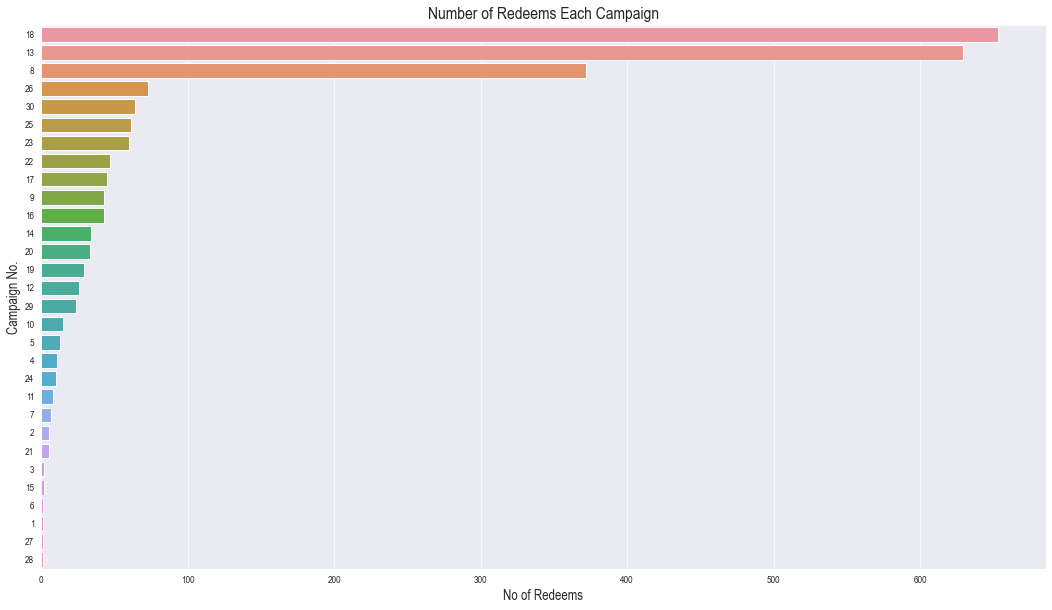

In [66]:
redeem_frequency = pd.DataFrame(list(zip(df_coupons_redempt.CAMPAIGN.value_counts().index, df_coupons_redempt.CAMPAIGN.value_counts())),columns=["Campaign","No of Redeems"])
fig = plt.figure(figsize=(18,10))
sns.barplot(y="Campaign",x="No of Redeems",data = redeem_frequency,orient="h",order=redeem_frequency.Campaign)
plt.title('Number of Redeems Each Campaign', fontsize=17)
plt.xlabel('No of Redeems', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

Most frequent campaigns (18, 13 and 8, all belongs to TypeA) attracts the most number of redeems as expected. 

### Redeem Rate Per Campaing


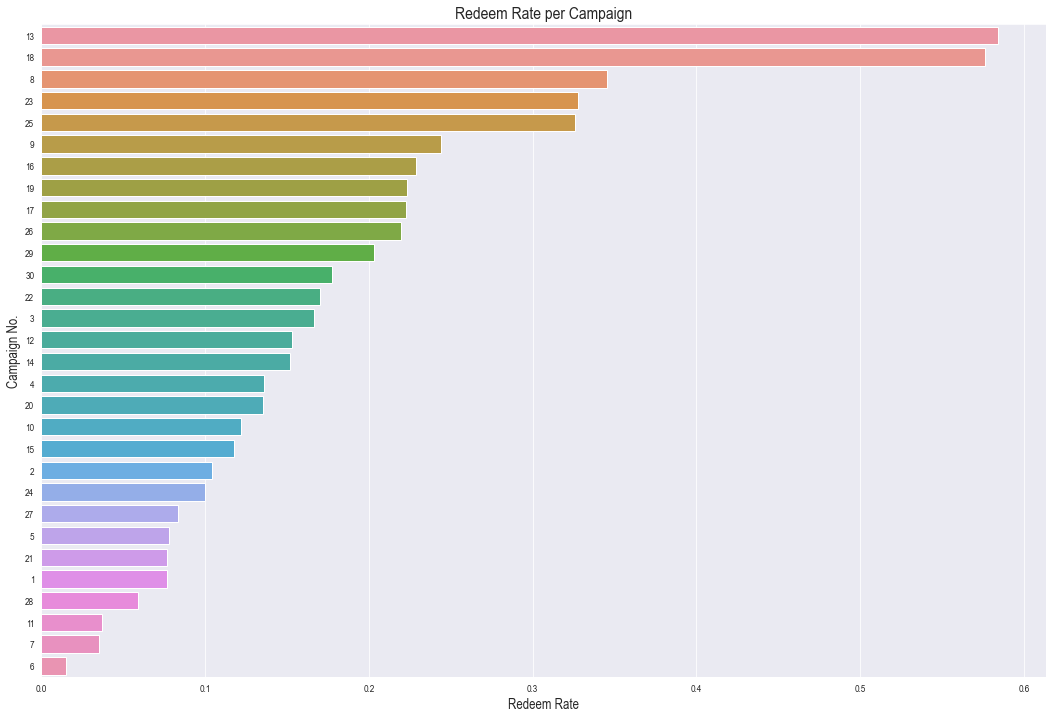

In [68]:
redems_per_camp = df_coupons_redempt.CAMPAIGN.value_counts().sort_values()/df_campaign_hh.CAMPAIGN.value_counts().sort_values()
redems_per_camp = pd.DataFrame(list(zip(redems_per_camp.index,redems_per_camp)),
                               columns=["Campaign","Redeem_Rate"]).sort_values(by="Redeem_Rate",ascending=False)
plt.figure(figsize=(18,12))
sns.barplot(y="Campaign",x="Redeem_Rate",data=redems_per_camp,orient="h",order=redems_per_camp.Campaign)
plt.title('Redeem Rate per Campaign', fontsize=17)
plt.xlabel('Redeem Rate', fontsize=14)
plt.ylabel('Campaign No.', fontsize=14)
plt.show()

Campaign 13 and 18 are clearly have higher redeem rates (~60%) as compared to the rest of campaigns.
Based on these results, campaign organisers did well by promoting the right campaigns (13 and 18) more frequently.